In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

pd.options.display.max_columns = None

### 1.	Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need. 

In [268]:
# bottle dataframe
df_b = pd.read_csv('../bottle.csv')

# cast dataframe
df_c = pd.read_csv('../cast.csv')

df_b.head()

c:\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,NaN,NaN,3,1.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,NaN,NaN,3,2.0,NaN,2.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,NaN,NaN,7,2.0,NaN,3.0,NaN,9.0,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,9.0,NaN,NaN,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [128]:
df_b.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,864863.000000,853900.000000,23127.000000,817509.000000,74914.000000,673755.000000,184676.000000,65823.00000,217797.000000,225272.000000,639166.000000,225271.000000,639170.000000,413317.000000,451786.000000,354091.000000,510866.000000,337576.000000,529474.000000,337403.000000,529933.000000,64962.000000,808299.000000,14432.000000,12760.000000,848605.000000,14414.000000,12742.000000,848623.000000,22649.000000,20457.000000,840440.000000,22650.000000,20457.000000,840439.000000,18651.000000,864863.000000,853900.000000,818816.000000,817509.000000,812007.000000,812092.000000,818206.000000,696201.000000,666448.000000,354099.000000,413325.000000,337411.000000,337584.000000,64982.000000,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,4.700273,2.017148,7.471829,2.716787,7.945057,8.999996,8.755615,8.46701,8.793487,0.450185,8.999848,0.198553,8.999844,1.564747,8.999320,26.606587,8.999687,0.042316,8.995458,17.302247,8.993122,0.084877,8.947668,9.757704,1.266928,8.999992,9.762613,1.267776,8.999992,0.155295,1.993450,8.999992,8.393530,1.256587,8.999992,18.356509,226.832495,10.799697,10.842295,33.840295,25.811010,220.938918,0.431763,3.392498,57.192940,26.606862,1.564736,17.302188,0.042336,0.084851,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,1.877428,0.148498,1.483097,0.450559,1.415355,0.003655,0.810973,1.11778,0.892111,1.208570,0.012318,0.376543,0.012507,1.035966,0.026895,27.648190,0.018768,0.104196,0.077426,14.581958,0.131516,0.273061,0.508844,23.983492,0.442372,0.002872,25.064529,0.442817,0.002872,0.224953,0.080671,0.002886,21.516374,0.436760,0.002886,29.852839,316.050007,4.243829,4.236435,0.462978,1.124645,93.483703,0.382336,2.073271,37.060537,27.648403,1.035973,14.581998,0.104201,0.273022,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,3.000000,1.000000,6.000000,2.000000,6.000000,6.000000,6.000000,6.00000,2.000000,-0.001000,8.000000,-3.890000,8.000000,0.000000,4.000000,0.000000,4.000000,0.000000,4.000000,-0.400000,4.000000,0.000000,4.000000,-0.240000,1.000000,8.000000,-0.200000,1.000000,8.000000,-0.010000,1.000000,8.000000,-0.220000,1.000000,8.000000,0.000000,0.000000,1.440000,0.000000,4.570000,20.934000,0.400000,0.000000,-0.010000,-0.100000,0.000000,0.000000,-0.400000,0.000000,0.000000,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,3.000000,2.000000,6.000000,2.000000,6.000000,9.000000,9.000000,9.00000,9.000000,0.050000,9.000000,0.050000,9.000000,0.470000,9.000000,3.110000,9.000000,0.000000,9.000000,0.600000,9.000000,0.000000,9.000000,0.930000,1.000000,9.000000,0.930000,1.000000,9.000000,0.060000,2.000000,9.000000,0.980000,1.000000,9.000000,0.280000,46.000000,7.680000,7.740000,33.488000,24.960000,143.700000,0.130000,1.360000,21.200000,3.100000,0.470000,0.600000,0.000000,0.000000,

In [129]:
# Removing extra spaces from column names using str.replace() method
df_b.columns = df_b.columns.str.replace(" ","")

In [130]:
# droping columns form dataframe where not null value less thresold = 500000
df1 = df_b.dropna(axis=1, thresh=500000)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 35 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Cst_Cnt      864863 non-null  int64  
 1   Btl_Cnt      864863 non-null  int64  
 2   Sta_ID       864863 non-null  object 
 3   Depth_ID     864863 non-null  object 
 4   Depthm       864863 non-null  int64  
 5   T_degC       853900 non-null  float64
 6   Salnty       817509 non-null  float64
 7   O2ml_L       696201 non-null  float64
 8   STheta       812174 non-null  float64
 9   O2Sat        661274 non-null  float64
 10  Oxy_µmol/Kg  661268 non-null  float64
 11  RecInd       864863 non-null  int64  
 12  T_prec       853900 non-null  float64
 13  S_prec       817509 non-null  float64
 14  P_qual       673755 non-null  float64
 15  Chlqua       639166 non-null  float64
 16  Phaqua       639170 non-null  float64
 17  SiO3qu       510866 non-null  float64
 18  NO2q         529474 non-

In [205]:
# droping some more columns that are redundant or not useful.
df2 = df1.drop(['Cst_Cnt','Btl_Cnt','Sta_ID','Depth_ID','T_prec','S_prec','P_qual','Chlqua','Phaqua','SiO3qu',
               'NO2q','NO3q','NH3q','C14A1q','C14A2q','DarkAq','MeanAq','Oxy_µmol/Kg','R_SALINITY','R_SIGMA',
                'O2ml_L','R_O2','R_O2Sat','R_TEMP','R_POTEMP'], axis=1)

# drop null value from salnty column
df3 = df2[df2['Salnty'].notnull()]
df4 = df3[df3['T_degC'].notnull()]

df5 = df4[df4['Salnty'].notnull()]
df6 = df5[df5['T_degC'].notnull()]

df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Depthm   814247 non-null  int64  
 1   T_degC   814247 non-null  float64
 2   Salnty   814247 non-null  float64
 3   STheta   812174 non-null  float64
 4   O2Sat    661274 non-null  float64
 5   RecInd   814247 non-null  int64  
 6   R_Depth  814247 non-null  float64
 7   R_SVA    812092 non-null  float64
 8   R_DYNHT  808795 non-null  float64
 9   R_PRES   814247 non-null  int64  
dtypes: float64(7), int64(3)
memory usage: 68.3 MB


In [206]:
df6.var()

Depthm     95269.444601
T_degC        17.850034
Salnty         0.213108
STheta         1.363727
O2Sat       1375.974970
RecInd         3.498452
R_Depth    95269.281116
R_SVA       8739.202810
R_DYNHT        0.146698
R_PRES     97319.303250
dtype: float64

In [208]:
# Scaling dataset using Standard Scaler method because of too high variance for some of the columns showed above.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df7 = pd.DataFrame(scaler.fit_transform(df6),columns=df6.columns)



In [209]:
df7.var()

Depthm     1.000001
T_degC     1.000001
Salnty     1.000001
STheta     1.000001
O2Sat      1.000002
RecInd     1.000001
R_Depth    1.000001
R_SVA      1.000001
R_DYNHT    1.000001
R_PRES     1.000001
dtype: float64

In [223]:
df7.describe()

,Depthm,T_degC,Salnty,STheta,O2Sat,RecInd,R_Depth,R_SVA,R_DYNHT,R_PRES
count,8.142470e+05,8.142470e+05,8.142470e+05,8.121740e+05,6.612740e+05,8.142470e+05,8.142470e+05,8.120920e+05,8.087950e+05,8.142470e+05
mean,5.640731e-17,-4.049040e-17,-2.082267e-14,-1.324896e-15,6.670532e-16,-1.540031e-16,3.462627e-17,-4.096182e-16,-3.733359e-16,-5.696580e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-7.190397e-01,-2.229692e+00,-1.171993e+01,-4.183465e+00,-1.542126e+00,-9.050986e-01,-7.190421e-01,-2.359118e+00,-1.131809e+00,-7.162078e-01
25%,-5.700071e-01,-7.361753e-01,-7.632364e-01,-7.316353e-01,-9.706064e-01,-9.050986e-01,-5.700094e-01,-8.262292e-01,-7.767284e-01,-5.687531e-01
50%,-3.140598e-01,-1.775858e-01,5.342512e-02,1.512317e-01,-7.288973e-02,-9.050986e-01,-3.140619e-01,-1.897542e-01,-2.441080e-01,-3.123101e-01
75%,2.529121e-01,7.265717e-01,7.704409e-01,7.078403e-01,1.091716e+00,1.233466e+00,2.529104e-01,8.435816e-01,5.391572e-01,2.518644e-01
max,1.661734e+01,4.800014e+00,6.915981e+00,1.926419e+02,4.232376e+00,1.233466e+00,1.661735e+01,4.946973e+00,8.998422e+00,1.677961e+01


### 2.	Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature

In [210]:
cor_mat = df7.corr()
cor_mat

,Depthm,T_degC,Salnty,STheta,O2Sat,RecInd,R_Depth,R_SVA,R_DYNHT,R_PRES
Depthm,1.000000,-0.676504,0.572867,0.582710,-0.595547,0.078024,1.000000,-0.669232,0.927213,0.999994
T_degC,-0.676504,1.000000,-0.505266,-0.829155,0.850596,-0.062625,-0.676502,0.964171,-0.799196,-0.675116
Salnty,0.572867,-0.505266,1.000000,0.603470,-0.790231,0.065717,0.572866,-0.698367,0.670143,0.571640
STheta,0.582710,-0.829155,0.603470,1.000000,-0.876899,0.060133,0.582711,-0.863456,0.703216,0.581409
O2Sat,-0.595547,0.850596,-0.790231,-0.876899,1.000000,-0.066473,-0.595547,0.926888,-0.775361,-0.593737
RecInd,0.078024,-0.062625,0.065717,0.060133,-0.066473,1.000000,0.078025,-0.066331,0.086756,0.077883
R_Depth,1.000000,-0.676502,0.572866,0.582711,-0.595547,0.078025,1.000000,-0.669230,0.927212,0.999994
R_SVA,-0.669232,0.964171,-0.698367,-0.863456,0.926888,-0.066331,-0.669230,1.000000,-0.809879,-0.667728
R_DYNHT,0.927213,-0.799196,0.670143,0.703216,-0.775361,0.086756,0.927212,-0.809879,1.000000,0.926167
R_PRES,0.999994,-0.675116,0.571640,0.581409,-0.593737,0.077883,0.999994,-0.667728,0.926167,1.000000


#### As per correlation matrix above and heat map below we can see correlation between fetaure set of dataset. As per heat map we can see that temperature is strongly negatively corrrelated to Depth, Stheta where as negatively correlated to salinity. Negative correaltion means as temprature goes up then hoghly negatively correlated variables goes down where as when positively correlated then when one variable goes up then positively correalted varibale aslo go up. We can also see that water temperature is positively correlated to O2 sat and R_SVA.

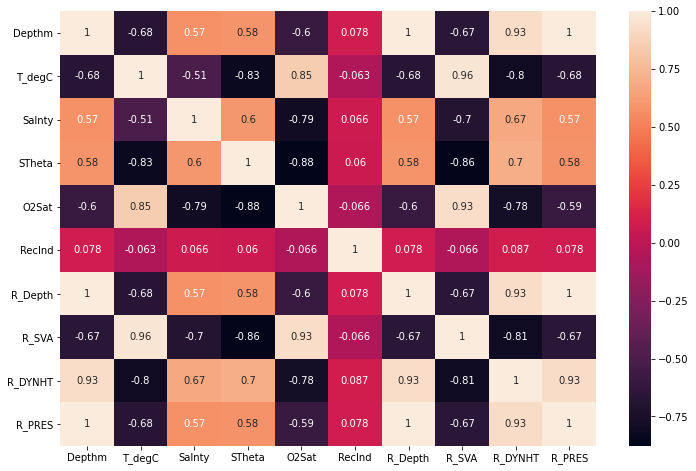

In [211]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cor_mat,annot=True)
plt.show()



### 3.	Perform linear regression on the dataset to see if you can predict water temperature based on salinity. 

In [212]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814247 entries, 0 to 814246
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Depthm   814247 non-null  float64
 1   T_degC   814247 non-null  float64
 2   Salnty   814247 non-null  float64
 3   STheta   812174 non-null  float64
 4   O2Sat    661274 non-null  float64
 5   RecInd   814247 non-null  float64
 6   R_Depth  814247 non-null  float64
 7   R_SVA    812092 non-null  float64
 8   R_DYNHT  808795 non-null  float64
 9   R_PRES   814247 non-null  float64
dtypes: float64(10)
memory usage: 62.1 MB


In [261]:
reg = LinearRegression()

X = np.array(df7['Salnty']).reshape(-1,1)
y = np.array(df7['T_degC']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,  random_state=45)

reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

accuracy_score = reg.score(X_test, y_test)

print(y_pred)
print(accuracy_score)

[[ 0.36923861]
 [-0.57987351]
 [ 0.02291133]
 ...
 [-0.22916233]
 [-0.29053679]
 [-0.28834484]]
0.2536793464693524


### 4.	Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics . 


#### Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error. whereas R2 or r2  "R squared",  is a metric that represents how much a dependent variable is explained by an independent variable or variables in a regression model or the proportion of the variance in the dependent variable that is predictable from the independent variable

In [262]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# calculating r2 value
r2_score(y_test, y_pred)

0.2536793464693524

In [263]:
# calculating Mean Squared Error (MSE).
mean_squared_error(y_test, y_pred)

0.7471362975580711

### 5.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values. 

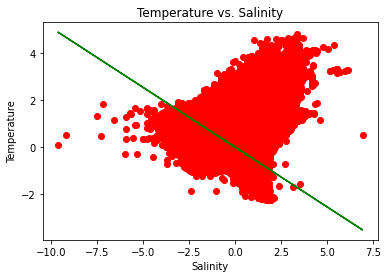

In [226]:
plt.scatter(X_test, y_test, color = 'r')
plt.plot(X_test, y_pred, color='g')
plt.title('Temperature vs. Salinity')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

### 6.	Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. In other words, An algorithm which can identify polynomial correlations with several independent variables up to a certain degree n. 

We use polynomial regression when the relationship between a predictor and response variable is nonlinear.It is defined as the relationship between the independent and dependent variables when the dependent variable is related to the independent variable having an nth degree. It does not require the relationship between dependent and independent variables to be linear, so if the line is a curve than it may have any polynomial term.The main difference between linear and polynomial regression is that linear regression requires the dependent and independent variables to be linearly related while this may better fit the line if we include any higher degree to the independent variable term in the equation.If we add higher degrees such as quadratic, then it turns the line into a curve that better fits the data. Generally, it is used when the points in the data set are scattered and the linear model is not able to describe the result clearly. We should always keep an eye on Overfitting and Underfitting while considering these degrees to the equation.

### 7.	Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here. 

In [244]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

poly.fit(X_poly,y)

#y_pred = poly.predict(X_test)

reg2 = LinearRegression()
reg2.fit(X_poly,y)

y_pred = reg2.predict(X_poly)

accuracy_score = reg2.score(X_poly, y)

print('R2 score :' , r2_score(y, y_pred))
print('Mean squared error :' , mean_squared_error(y, y_pred))
print('Accuracy score :' , accuracy_score)


R2 score : 0.37332245492539284
Mean squared error : 0.6266775450746069
Accuracy score : 0.37332245492539284


### 8.	Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved. 

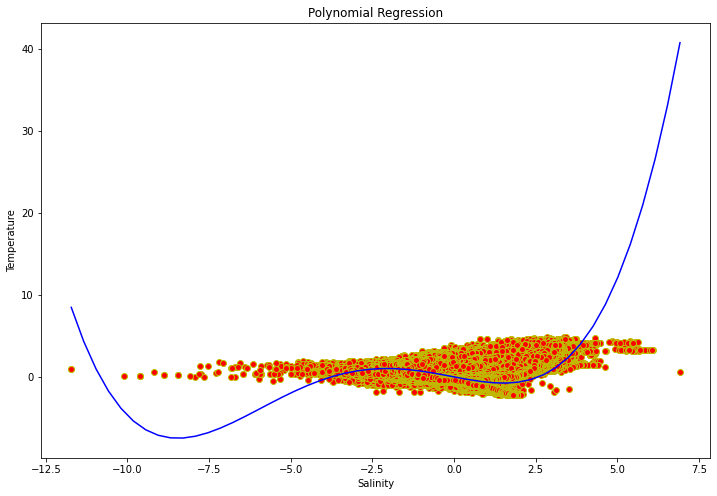

In [256]:
pred_space = np.linspace(min(X),max(X))
plt.figure(figsize=(12,8))
plt.scatter(X, y, color = 'r',edgecolor='y')
plt.plot(pred_space, reg2.predict(poly.fit_transform(pred_space)), color='b')
plt.title('Polynomial Regression')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()